In [ ]:
%%HTML
<style> code {background-color : pink !important;} </style>

Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('calibration_wide/GO*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #write_name = 'corners_found'+str(idx)+'.jpg'
        #cv2.imwrite(write_name, img)
        cv2.imshow('img', img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

In [25]:
image = cv2.imread(images[1])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
print(type(corners))
print(corners[1][0])

<class 'numpy.ndarray'>
[255.69652 285.5673 ]


### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

Text(0.5, 1.0, 'Undistorted Image')

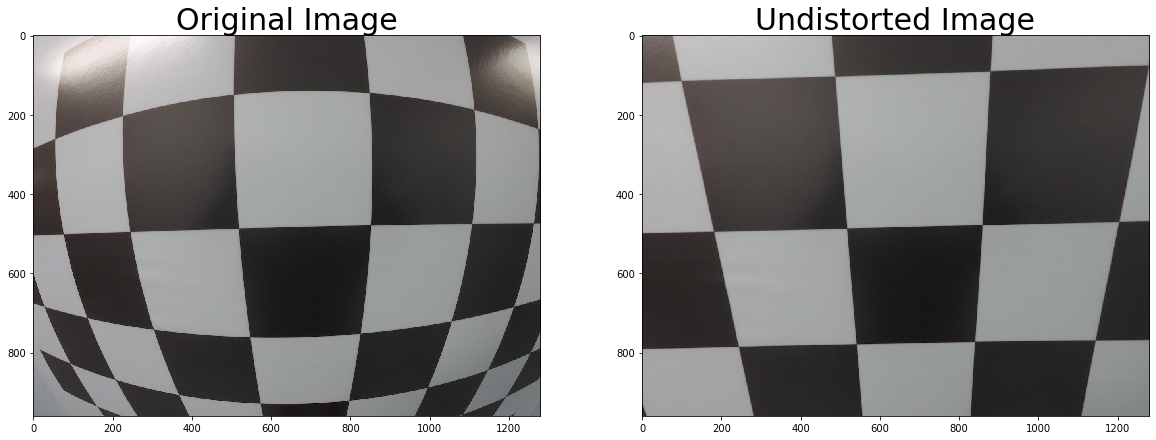

In [6]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('calibration_wide/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('calibration_wide/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration_wide/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

origin img shape (960, 1280, 3)
type of image in cv <class 'numpy.ndarray'>
960
top_down.shape (960, 1280, 3)


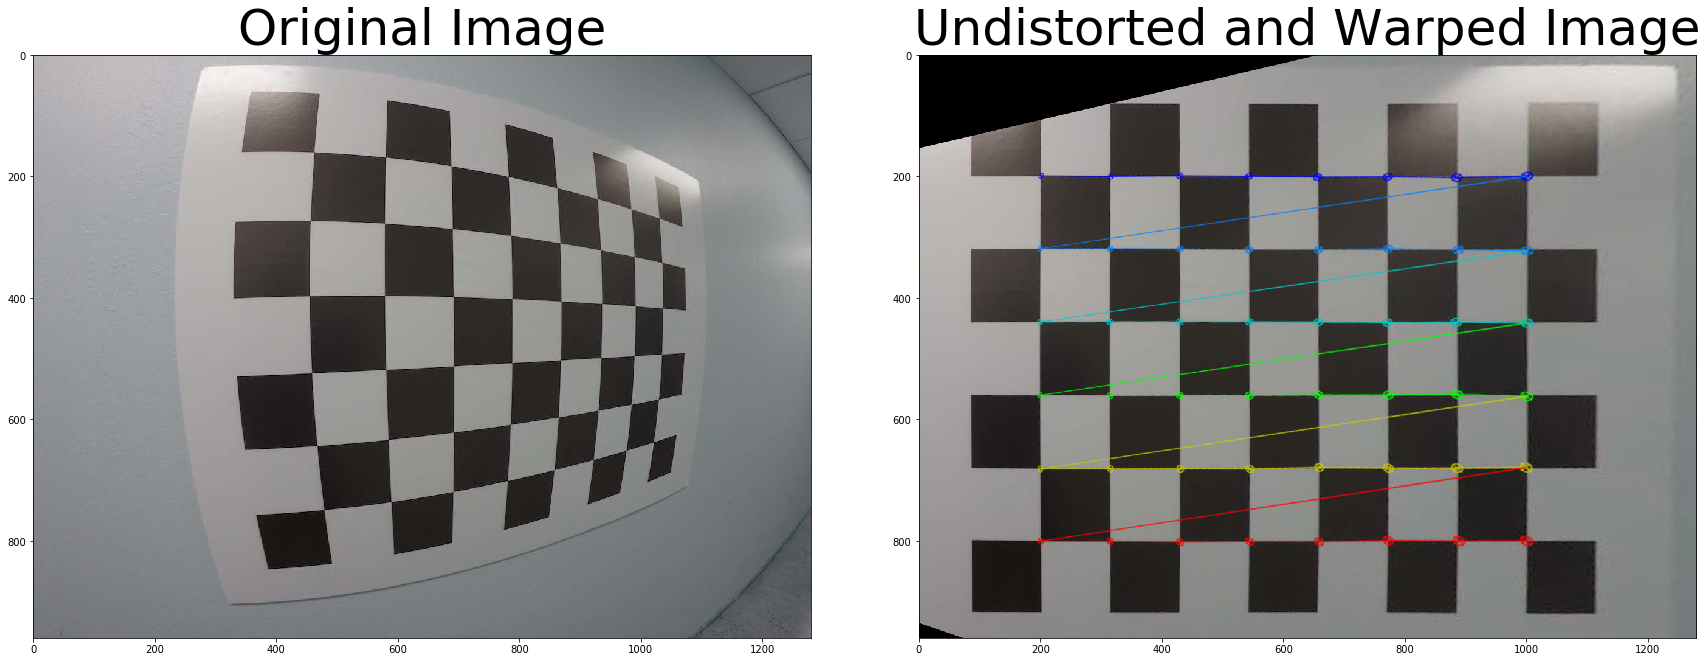

In [64]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    img_size = (img.shape[1], img.shape[0])
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # 4) If corners found: 
    if ret == True:
            # a) draw corners
            corn_img = cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]]) use auto detected corners
#             src = np.float32([corners[0][0], corners[7][0], corners[8][0], corners[15][0]])
#             dst = np.float32([[200, 100], [800, 100], [200, 200],[800, 200]])
            src = np.float32([corners[0][0], corners[7][0], corners[40][0], corners[47][0]])
            dst = np.float32([[200, 200], [1000, 200], [200, 800],[1000, 800]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src, dst)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            warped = cv2.warpPerspective(corn_img, M, img_size, flags=cv2.INTER_LINEAR)
    #delete the next two lines9
    # M = None
    # warped = np.copy(img) 
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
print(f"origin img shape {img.shape}")
print(f"type of image in cv {type(img)}")
print(img.shape[0])
print(f"top_down.shape {top_down.shape}")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [55]:
img_size = (img.shape[0], img.shape[1])
undist = cv2.undistort(img, mtx, dist, None, mtx)
# 2) Convert to grayscale
gray = cv2.cvtColor(undist, cv2.COLOR_RGB2GRAY)
# 3) Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
print(len(corners))# 4) If corners found: 
if ret == True:
        # a) draw corners
        corn_img = cv2.drawChessboardCorners(gray, (nx, ny), corners, ret)
        # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
        src = np.float32([corners[0][0], corners[7][0], corners[15][0], corners[8][0]])
print(src)

48
[[ 436.5321   114.34142]
 [1104.0494   224.6536 ]
 [1097.8323   319.411  ]
 [ 441.40747  256.56927]]


In [54]:
src = np.float32([corners[0][0], corners[7][0], corners[8][0], corners[15][0]])
dst = np.float32([[200, 100], [800, 100], [200, 200],[800, 200]])
M = cv2.getPerspectiveTransform(src, dst)
print(M)

[[ 4.21687397e-01 -3.87303015e-02 -1.56712726e+01]
 [-1.32213808e-01  5.56727187e-01  7.60487611e+01]
 [-3.84223294e-04 -1.08206738e-04  1.00000000e+00]]


In [58]:
src = np.float32([corners[0][0], corners[7][0], corners[40][0], corners[47][0]])
dst = np.float32([[200, 200], [1000, 200], [200, 800],[1000, 800]])
M = cv2.getPerspectiveTransform(src, dst)
print(M)

[[ 5.53258688e-01 -5.07092256e-02 -7.38115209e+01]
 [-1.91716838e-01  6.45378516e-01  1.71802551e+02]
 [-4.06487388e-04 -1.13937145e-04  1.00000000e+00]]


origin img shape (960, 1280, 3)
type of image in cv <class 'numpy.ndarray'>
960
top_down.shape (960, 1280, 3)


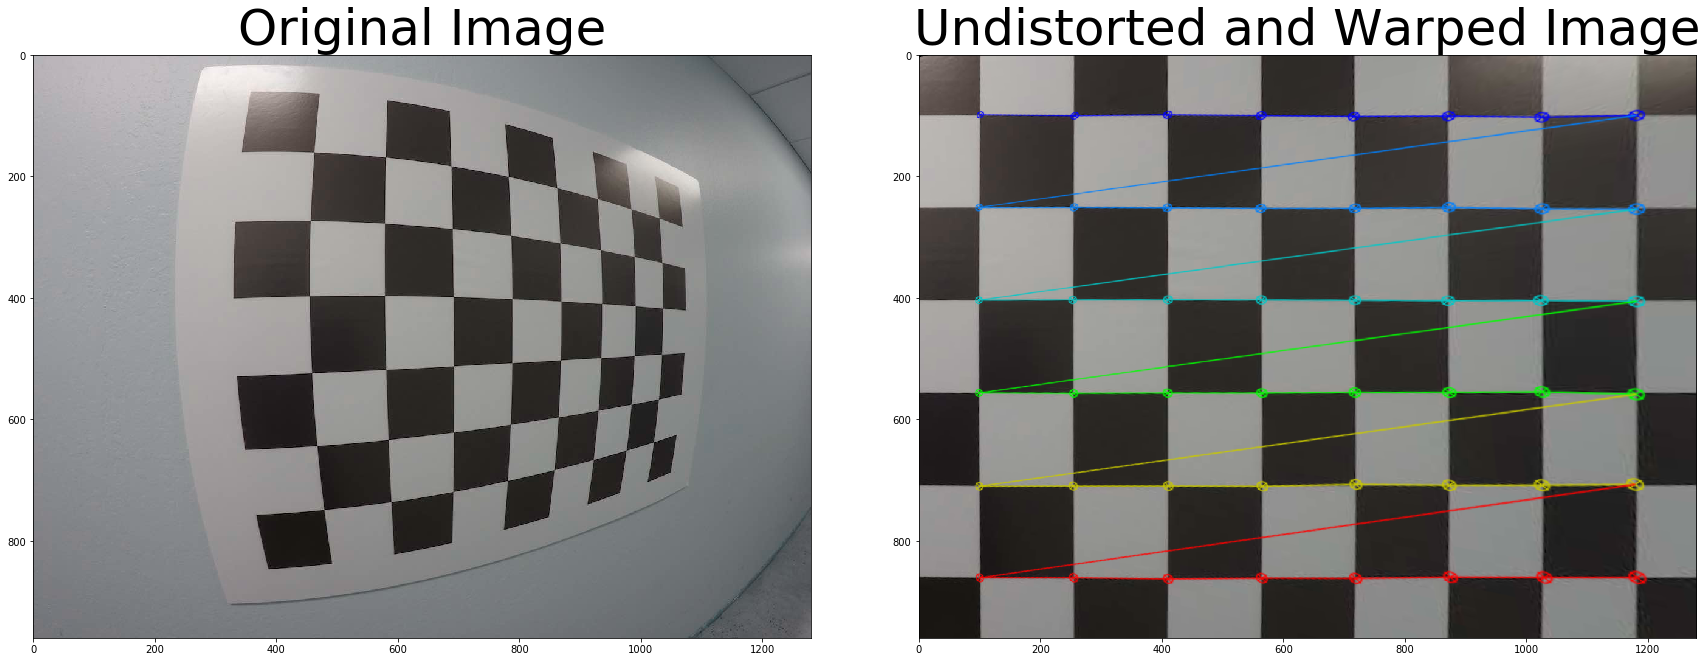

In [61]:
def corners_unwarp_sol(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M

top_down, perspective_M = corners_unwarp_sol(img, nx, ny, mtx, dist)
print(f"origin img shape {img.shape}")
print(f"type of image in cv {type(img)}")
print(img.shape[0])
print(f"top_down.shape {top_down.shape}")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
